# Capstone 2: Biodiversity Project

# Introduction
You are a biodiversity analyst working for the National Parks Service.  You're going to help them analyze some data about species at various national parks.

Note: The data that you'll be working with for this project is *inspired* by real data, but is mostly fictional.

# Step 1
Import the modules that you'll be using in this assignment:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Step 2
You have been given two CSV files. `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:
- Load `species_info.csv` into a DataFrame called `species`

In [2]:
species = pd.read_csv('species_info.csv')

Inspect each DataFrame using `.head()`.

In [3]:
#print(species.head(10))

print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


# Step 3
Let's start by learning a bit more about our data.  Answer each of the following questions.

How many different species are in the `species` DataFrame?

In [4]:
# Let's do this for scientific name, as the column "common_names" is going to need some unpacking.
print(species.scientific_name.nunique())

#From the output line below, there seem to be 5,541 unique scientific names in the DataFrame.

5541


What are the different values of `category` in `species`?

In [5]:
print(species.category.unique())

#From the output line below, the different categories in species seem to be:
#Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, Nonvascular Plant

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


What are the different values of `conservation_status`?

In [6]:
print(species.conservation_status.unique())

#From the output line below, the different values of conservation_status seem to be:
#Species of Concern, Endangered, Threatened, and In Recovery
#There are of course species with no conservation_status provided, so these values
#are blank in the DataFrame. This seems to be showing up as nan rather than None.

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


# Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` meet each of these criteria.

In [7]:
num_of_conserve_species = species.groupby('conservation_status').scientific_name.nunique().reset_index()

print(num_of_conserve_species)

# Using .count() to create num_of_conserve_species yields 16 endangered, 4 in recovery, 161 species of concern, 
# and 10 threatened; 191 in total, matches the number of non-null entries in the species DataFrame. 
# Using .nunique() to create num_of_conserve_species yields 15 endangered, 4 in recovery, 151 species of concern, 
# and 10 threatened; 180 in total, so apparently 11 species are duplicated; 1 in endangered (from below, that looks
# to be the grey wolf) and 10 in species of concern.

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2  Species of Concern              151
3          Threatened               10


As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.  We can do this using `.fillna`.  We pass in however we want to fill in our `None` values as an argument.

MAC note from Pandas documentation: .fillna() fills na/NaN values using a specified method. Apparently here we are not specifying a method, so we'll literally just replace the nans with the specified string.

Paste the following code and run it to see replace `None` with `No Intervention`:
```python
species.fillna('No Intervention', inplace=True)
```

In [8]:
species.fillna('No Intervention', inplace = True)

Great! Now run the same `groupby` as before to see how many species require `No Intervention`.

In [11]:
num_of_conserve_species = species.groupby('conservation_status').scientific_name.nunique().reset_index()

print(num_of_conserve_species)

# The output of num_of_conserve_species SHOULD be 5541, but it is actually 5543. 
# Where did those two extra species come from?
# Let's see if any of the species which are listed under a particular conservation status are also listed as having
# some other conservation status:
# Canis lupus (the Gray Wolf) is listed twice once under Endangered and once under In Recovery.
# According to a Google search on 07/23/2020, it should be listed as In Recovery (Least Concern, population stable)
# Oncorhynchus mykiss (the Rainbow Trout) is listed twice, under both No Intervention and Threatened
# I ran a Google search on 07/23/2020 for Rainbow Trout, and according to the US Fish and Wildlife service it's not
# on the Endangered Species Act. So I will take this to mean "No Intervention"
# Let's fix these two issues and see what happens to the overall numbers:

#gray_wolf = species[species.scientific_name == "Canis lupus"]
#print(gray_wolf)

#species.drop([8,4448], inplace = True)

#rainbow_trout = species[species.scientific_name == 'Oncorhynchus mykiss']
#print(rainbow_trout)

#species.drop([3283], inplace = True)

# Sure enough, that fixes the problem!

  conservation_status  scientific_name
0          Endangered               14
1         In Recovery                4
2     No Intervention             5363
3  Species of Concern              151
4          Threatened                9


Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.

Paste the following code and run it to create a new DataFrame called `protection_counts`, which is sorted by `scientific_name`:
```python
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')
```

In [12]:
protection_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index()\
                    .sort_values(by = 'scientific_name')

print(protection_counts)

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened                9
0          Endangered               14
3  Species of Concern              151
2     No Intervention             5363


Now let's create a bar chart!
1. Start by creating a wide figure with `figsize=(10, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `conservation_status` in `protection_counts`
5. Label the y-axis `Number of Species`
6. Title the graph `Conservation Status by Species`
7. Plot the grap using `plt.show()`

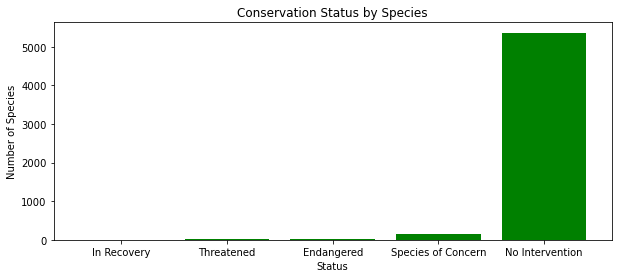

In [13]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
numofstats = range(len(protection_counts))
plt.bar(numofstats, protection_counts.scientific_name, color = 'green')
ax.set_xticks(numofstats)
ax.set_xticklabels(protection_counts.conservation_status)
plt.ylabel('Number of Species')
plt.xlabel('Status')
plt.title ('Conservation Status by Species')
plt.savefig('Conservation_Status_bar_graph.png')
plt.show()

# Step 4
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [14]:
# Let's practice using the isin() function:

species['is_protected'] = species.conservation_status.isin(['Species of Concern', \
                                                            'Endangered', 'Threatened', 'In Recovery'])


Let's group the `species` data frame by the `category` and `is_protected` columns and count the unique `scientific_name`s in each grouping.

Save your results to `category_counts`.

Examine `category_counts` using `head()`.

In [15]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()

In [16]:
print(category_counts.head())

    category  is_protected  scientific_name
0  Amphibian         False               72
1  Amphibian          True                7
2       Bird         False              413
3       Bird          True               75
4       Fish         False              115


It's going to be easier to view this data if we pivot it.  Using `pivot`, rearange `category_counts` so that:
- `columns` is `is_protected`
- `index` is `category`
- `values` is `scientific_name`

Save your pivoted data to `category_pivot`. Remember to `reset_index()` at the end.

In [17]:
category_pivot = category_counts.pivot(columns = 'is_protected', index = 'category', \
                                       values = 'scientific_name' ).reset_index().sort_values(by=False)

Examine `category_pivot`.

In [18]:
print(category_pivot)

is_protected           category  False  True
0                     Amphibian     72     7
5                       Reptile     73     5
2                          Fish    115    10
3                        Mammal    146    30
4             Nonvascular Plant    328     5
1                          Bird    413    75
6                Vascular Plant   4216    46


Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [19]:
category_pivot.rename(columns = {'is_protected':'', 'category':'Category', \
                                 False:'Not Protected', True:'Protected'}, inplace = True)
print(category_pivot)

is_protected           Category  Not Protected  Protected
0                     Amphibian             72          7
5                       Reptile             73          5
2                          Fish            115         10
3                        Mammal            146         30
4             Nonvascular Plant            328          5
1                          Bird            413         75
6                Vascular Plant           4216         46


Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

In [20]:
category_pivot['Percent Protected'] = round(100.0 * category_pivot['Protected'] / (category_pivot['Not Protected'] + \
                                            category_pivot['Protected']),2)

Examine `category_pivot`.

In [21]:
print(category_pivot)

is_protected           Category  Not Protected  Protected  Percent Protected
0                     Amphibian             72          7               8.86
5                       Reptile             73          5               6.41
2                          Fish            115         10               8.00
3                        Mammal            146         30              17.05
4             Nonvascular Plant            328          5               1.50
1                          Bird            413         75              15.37
6                Vascular Plant           4216         46               1.08


It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before you do the significance test, consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, you should choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

Create a table called `contingency` and fill it in with the correct numbers

In [22]:
contingency1 = [[413,75],[146,30]]

In order to perform our chi square test, we'll need to import the correct function from scipy.  Past the following code and run it:
```py
from scipy.stats import chi2_contingency
```

In [23]:
from scipy.stats import chi2_contingency

Now run `chi2_contingency` with `contingency`.

In [24]:
chi2_1, pvalue_1, dof_1, expected_1 = chi2_contingency(contingency1)

print(pvalue_1)

0.6875948096661336


It looks like this difference isn't significant!

Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [25]:
contingency2 = [[73,5],[146,30]]

chi2_2, pvalue_2, dof_2, expected_2 = chi2_contingency(contingency2)

print(pvalue_2)

0.03835559022969898


Yes! It looks like there is a significant difference between `Reptile` and `Mammal`!

In [29]:
# MAC note: OK fine, there's a "significant" difference between reptiles and mammals. (That's barely over 2 sigma,
# I don't know if I'd call that significant.) But what about all of the other species types out there? 

# First let's look at birds compared to all other non-mammal categories:

contingency3 = [[413,75],[72,7],[73,5],[115,10],[328,5],[4216,46]]

chi2_3, pvalue_3, dof_3, expected_3 = chi2_contingency(contingency3)
#print(pvalue_3)

# The above results in a p-value on the order of 10^-76.
# Ugh.
# OK, OK, fine, I'll compare them pairwise then.

# Birds and amphibians:
# contingency4 = [[413,75],[72,7]]
# p-value: 0.1759

# Birds and reptiles:
#contingency4 = [[413,75],[73,5]]
# p-value: 0.05313

# Birds and fish:
# contingency4 = [[413,75],[115,10]]
# p-value: 0.04748

# Birds and non-vascular plants:
#contingency4 = [[413,75],[328,5]]
# p-value: 1.05e-10

# Birds and vascular plants:
contingency4 = [[413,75],[4216,46]]
# p-value: 4.4e-79
chi2_4, pvalue_4, dof_4, expected_4 = chi2_contingency(contingency4)
#print(pvalue_4)

# Having learned my lesson above, I am going to go right to pairwise tests between mammals and non-bird categories:
# Mammals and amphibians:
#contingency5 = [[146,30],[72,7]]
# p-value: 0.1275

# Mammals and reptiles:
#contingency5 = [[146,30],[73,5]]
# p-value: 0.03836

# Mammals and fish:
# contingency5 = [[146,30],[115,10]]
# p-value: 0.0352

# Mammals and non-vascular plants:
# contingency5 = [[146,30],[328,5]]
# p-value: 1.48e-10

# Mammals and vascular plants:
contingency5 = [[146,30],[4216,46]]
# p-value: 1.44e-55

chi2_5, pvalue_5, dof_5, expected_5 = chi2_contingency(contingency5)
#print(pvalue_5)

# Step 5

Conservationists have been recording sightings of different species at several national parks for the past 7 days.  They've saved sent you their observations in a file called `observations.csv`.  Load `observations.csv` into a variable called `observations`, then use `head` to view the data.

In [30]:
observations = pd.read_csv('observations.csv')

print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.  Notice that the following code will tell us whether or not a word occurs in a string:

In [31]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [32]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [33]:
species['is_sheep'] = species.common_names.apply(lambda x: 'Sheep' in x)

Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [34]:
heres_some_sheep = species[species.is_sheep == True]
heres_some_sheep.reset_index(drop = True, inplace = True)

print(heres_some_sheep)

         category              scientific_name  \
0          Mammal                   Ovis aries   
1  Vascular Plant             Rumex acetosella   
2  Vascular Plant           Festuca filiformis   
3          Mammal              Ovis canadensis   
4  Vascular Plant             Rumex acetosella   
5  Vascular Plant            Rumex paucifolius   
6  Vascular Plant                 Carex illota   
7  Vascular Plant  Potentilla ovina var. ovina   
8          Mammal      Ovis canadensis sierrae   

                                        common_names conservation_status  \
0  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1                        Sheep Sorrel, Sheep Sorrell     No Intervention   
2                              Fineleaf Sheep Fescue     No Intervention   
3                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
4  Common Sheep Sorrel, Field Sorrel, Red Sorrel,...     No Intervention   
5   Alpine Sheep Sorrel, Fewleaved Dock, Me

Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [35]:
sheep_species = species[(species.is_sheep == True) & (species.category == 'Mammal')]
sheep_species.reset_index(drop = True, inplace = True)

print(sheep_species)

  category          scientific_name  \
0   Mammal               Ovis aries   
1   Mammal          Ovis canadensis   
2   Mammal  Ovis canadensis sierrae   

                                        common_names conservation_status  \
0  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
2                        Sierra Nevada Bighorn Sheep          Endangered   

   is_protected  is_sheep  
0         False      True  
1          True      True  
2          True      True  


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [36]:
sheep_observations = sheep_species.merge(observations)

print(sheep_observations.head())

  category  scientific_name  \
0   Mammal       Ovis aries   
1   Mammal       Ovis aries   
2   Mammal       Ovis aries   
3   Mammal       Ovis aries   
4   Mammal  Ovis canadensis   

                                        common_names conservation_status  \
0  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
2  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                       Bighorn Sheep, Bighorn Sheep  Species of Concern   

   is_protected  is_sheep                            park_name  observations  
0         False      True               Yosemite National Park           126  
1         False      True  Great Smoky Mountains National Park            76  
2         False      True                  Bryce National Park           119  
3         False      True            Yel

How many total sheep observations (across all three species) were made at each national park?  Use `groupby` to get the `sum` of `observations` for each `park_name`.  Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [37]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index().sort_values(by='observations')

print(obs_by_park)

                             park_name  observations
1  Great Smoky Mountains National Park           149
0                  Bryce National Park           250
3               Yosemite National Park           282
2            Yellowstone National Park           507


Create a bar chart showing the different number of observations per week at each park.

1. Start by creating a wide figure with `figsize=(16, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `park_name` in `obs_by_park`
5. Label the y-axis `Number of Observations`
6. Title the graph `Observations of Sheep per Week`
7. Plot the grap using `plt.show()`

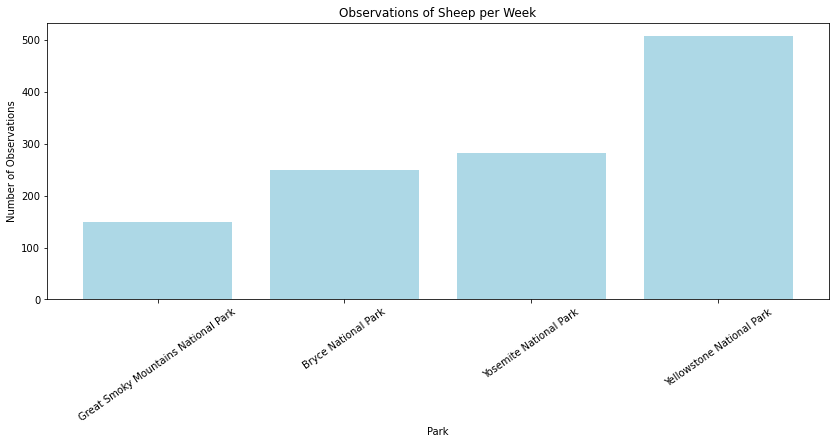

In [38]:
plt.figure(figsize=(14,8))
ax = plt.subplot(1,1,1)
numofparks = range(len(obs_by_park))
plt.bar(numofparks, obs_by_park.observations, color = 'lightblue')
ax.set_xticks(numofparks)
ax.set_xticklabels(obs_by_park.park_name, rotation = 35)
plt.title('Observations of Sheep per Week')
plt.xlabel('Park')
plt.ylabel('Number of Observations')
plt.subplots_adjust(bottom = 0.4)
plt.savefig('Sheep_Observations_per_Park.png')
plt.show()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage points.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use <a href="https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html">Codecademy's sample size calculator</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [39]:
# The baseline conversion rate seems to be 15%, as that's the current percentage of sheep with foot and mouth disease
# We would like to see a 33.33% reduction in the rate of foot and mouth disease
# current rate 15%, seek a 5 percent deduction ... that means down to 10%
# 10 - 15 / 15, and take the absolute value; yields 33.33%.
# So the minimum detectable effect is 33.33%
# And we're dold to seek a significance level of 90%
# Heading to the sample size calculator link and filling in the appropriate values, we get ...
# 870
# So we'll need 870 observations.

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [40]:
# Right now, Bryce National Park makes 250 sheep observations per week
# 870 observations / 250 observations/week
# That's a total of ...
# 3.5 weeks   (technically 3.48 but I am rounding up)
#
# Right now, Yellowstone National Park makes 507 sheep observations per week
# 870 observations / 507 observations/week
# That's a total of ...
# 1.7 weeks
# So I guess we could call that 2 weeks if we wanted to.